<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Regression Model

---

# Part 2: Data Cleaning, Feature selection and Feature Engineering
    Part 1: Problem Statement & Exploratory Data Analysis (EDA)
    Part 2: Data Cleaning, Feature selection and Feature Engineering

---

### Contents:
- [Import Data and Libraries](#Import-Data-and-Libraries)
- [Data Clean](#Data-Clean)
- [Converting categorical columns with unequal weightages to nominal columns](#Converting-categorical-columns-with-unequal-weightages-to-nominal-columns)
- [Split of the features with Response](#Split-of-the-features-with-Response)
- [Train/Test Split](#Train/Test-Split)
- [Use of Simple Imputer](#Use-of-Simple-Imputer)
- [One hot-encoding (getdummies)](#One-hot-encoding-(getdummies)) 
- [Consider columns to drop prior to modelling](#Consider-columns-to-drop-prior-to-modelling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Import Data and Libraries

In [2]:
#import data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm 
# For use of label encoder
from sklearn import preprocessing
# imputation transformer for completing missing values
from sklearn.impute import SimpleImputer

###
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
# Data Import (train)
train = pd.read_csv('datasets/train.csv')
print(train.shape)
print(train.head(5))
train.info()

(2051, 81)
    Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  

In [4]:
# Data Import (test)
act_test = pd.read_csv('datasets/test.csv')
print(act_test.shape)
print(act_test.head(5))
act_test.info()

(878, 80)
     Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Q

## Data Clean

## Converting categorical columns with unequal weightages to nominal columns

In [5]:
# Cleaning of the train
# Fill in categorical columns which does not have equal weightages between options. 
train_c = []
train_c = train.copy()
# Removal of duplicate column
train_c = train_c.drop_duplicates()

## Use Mapping to encode the catagorical columns which has ranking within the categories into ordinals.
# Type casting the str into int (Alley)
train_c['Alley'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Qual)
train_c['Bsmt Qual'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Cond)
train_c['Bsmt Cond'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Exposure)
train_c['Bsmt Exposure'].fillna('NA', inplace=True)
# Type casting the str into int (BsmtFin Type 1)
train_c['BsmtFin Type 1'].fillna('NA', inplace=True)
# Type casting the str into int (BsmtFin Type 2)
train_c['BsmtFin Type 2'].fillna('NA', inplace=True)
# Type casting the str into int (Fireplace Qu)
train_c['Fireplace Qu'].replace(np.nan, 'NA', inplace=True)
# Type casting the str into int (Garage Finish)
train_c['Garage Finish'].fillna('NA', inplace=True)
# Type casting the str into int (Garage Qual)
train_c['Garage Qual'].fillna('NA', inplace=True)
# Typae casting the str into int (Garage Cond)
train_c['Garage Cond'].fillna('NA', inplace=True)
# Type casting the str into int (Pool QC)
train_c['Pool QC'].fillna('NA', inplace=True)
# Type casting the str into int (Fence)
train_c['Fence'].fillna('NA', inplace=True)

print(train_c.shape)
train_c.info()

(2051, 81)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  Hou

In [6]:
## Use Mapping to encode the catagorical columns which has ranking within the categories into ordinals.
# Type casting the str into int (Alley)
train_c['Alley'] = train_c['Alley'].map({'Grvl': 2, 'Pave':1, 'NA': 0})
# Type casting the str into int (Lot Shape)
train_c['Lot Shape'] = train_c['Lot Shape'].map({'Reg': 3, 'IR1':2 , 'IR2':1, 'IR3': 0})
# Type casting the str into int (Land Contor)
train_c['Land Contour'] = train_c['Land Contour'].map({'Lvl': 3, 'HLS':2 , 'Bnk':1, 'Low': 0})
# Type casting the str into int (Exter Qual)
train_c['Exter Qual'] = train_c['Exter Qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Exter Cond)
train_c['Exter Cond'] = train_c['Exter Cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Bsmt Qual)
train_c['Bsmt Qual'] = train_c['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Bsmt Cond)
train_c['Bsmt Cond'] = train_c['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Bsmt Exposure)
train_c['Bsmt Exposure'] = train_c['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
# Type casting the str into int (BsmtFin Type 1)
train_c['BsmtFin Type 1'] = train_c['BsmtFin Type 1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (BsmtFin Type 2)
train_c['BsmtFin Type 2'] = train_c['BsmtFin Type 2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (Heating QC)
train_c['Heating QC'] = train_c['Heating QC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Central Air)
train_c['Central Air'] = train_c['Central Air'].map({'Y': 1, 'N': 0})
# Type casting the str into int (Electrical)
train_c['Electrical'] = train_c['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
# Type casting the str into int (Kitchen Qual)
train_c['Kitchen Qual'] = train_c['Kitchen Qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Fireplace Qu)
train_c['Fireplace Qu'] = train_c['Fireplace Qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Garage Finish)
train_c['Garage Finish'] = train_c['Garage Finish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (Garage Qual)
train_c['Garage Qual'] = train_c['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Typae casting the str into int (Garage Cond)
train_c['Garage Cond'] = train_c['Garage Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Pool QC)
train_c['Pool QC'] = train_c['Pool QC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0})
# Type casting the str into int (Fence)
train_c['Fence'] = train_c['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0})


print(train_c.shape)
train_c.info()

(2051, 81)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   int64  
 8   Lot Shape        2051 non-null   int64  
 9   Land Contour     2051 non-null   int64  
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  Hou

In [7]:
### Drop of columns identified in part 1 notebook for train.
drp_clm = ['Id', 'PID', 'Bsmt Half Bath', 'Full Bath', '3Ssn Porch', 'Mo Sold', 'Yr Sold', 'Enclosed Porch', 'BsmtFin SF 2',
           'Low Qual Fin SF', 'Central Air', 'Garage Cond', 'Electrical', 'Exter Cond', 'Pool QC', 'BsmtFin Type 2', 
           'Fence']
train_c.drop(drp_clm, axis = 1, inplace=True)
### Drop of outlier in the train dataframe
train_c.drop(train_c.loc[train_c['Garage Yr Blt'] > 2200,:].index, inplace=True)
train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2050 non-null   int64  
 1   MS Zoning       2050 non-null   object 
 2   Lot Frontage    1720 non-null   float64
 3   Lot Area        2050 non-null   int64  
 4   Street          2050 non-null   object 
 5   Alley           2050 non-null   int64  
 6   Lot Shape       2050 non-null   int64  
 7   Land Contour    2050 non-null   int64  
 8   Utilities       2050 non-null   object 
 9   Lot Config      2050 non-null   object 
 10  Land Slope      2050 non-null   object 
 11  Neighborhood    2050 non-null   object 
 12  Condition 1     2050 non-null   object 
 13  Condition 2     2050 non-null   object 
 14  Bldg Type       2050 non-null   object 
 15  House Style     2050 non-null   object 
 16  Overall Qual    2050 non-null   int64  
 17  Overall Cond    2050 non-null   i

In [8]:
train_c.corr()

,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Misc Val,SalePrice
MS SubClass,1.000000,-0.389897,-0.245643,0.106794,0.074896,0.024381,0.036344,-0.070373,0.036480,0.045315,-0.004047,0.017709,0.056235,-0.019840,0.055480,0.061224,-0.060738,-0.139588,-0.225686,-0.023836,-0.245893,0.305545,0.068277,0.024718,0.179148,-0.003949,0.252073,-0.018619,0.034379,-0.054863,-0.057223,0.090903,-0.032936,-0.049035,-0.108193,-0.097719,0.001747,-0.020596,-0.038949,-0.004613,-0.027528,-0.086919
Lot Frontage,-0.389897,1.000000,0.574029,-0.159664,-0.128874,-0.050436,0.194938,-0.054472,0.109573,0.085107,0.218218,0.149087,0.096848,-0.002216,0.188111,0.043141,0.214194,0.127653,0.356730,0.088216,0.464069,0.013682,0.383864,0.111441,0.035829,0.220453,0.015851,0.177826,0.362704,0.253514,0.232559,0.069848,0.212888,0.297160,0.358463,0.102743,0.115193,0.184966,0.074813,0.156574,0.051673,0.341982
Lot Area,-0.245643,0.574029,1.000000,-0.087300,-0.301984,-0.273752,0.106041,-0.019251,0.036160,0.050925,0.169379,0.089373,0.060837,-0.010884,0.195091,0.042691,0.215478,0.041306,0.277399,0.022216,0.381823,0.029304,0.327451,0.116044,0.049907,0.138967,-0.013511,0.119771,0.238697,0.289583,0.201669,0.006301,0.124521,0.214999,0.263318,0.101137,0.155667,0.140792,0.067679,0.115096,0.093912,0.296794
Alley,0.106794,-0.159664,-0.087300,1.000000,0.109185,-0.031037,-0.117558,0.055547,-0.312411,-0.092248,-0.096074,-0.104104,-0.100819,-0.028262,-0.122714,-0.157054,-0.151714,0.030951,-0.137642,-0.056630,-0.145084,0.087602,-0.033085,-0.106003,-0.056186,-0.001219,0.034694,-0.069461,-0.017745,-0.114899,-0.105185,-0.215446,-0.191078,-0.112184,-0.112947,-0.131538,-0.092164,0.034644,0.007024,-0.016397,0.006185,-0.154698
Lot Shape,0.074896,-0.128874,-0.301984,0.109185,1.000000,0.107812,-0.248851,0.076972,-0.277413,-0.220903,-0.130376,-0.237302,-0.231651,-0.083668,-0.181016,-0.153821,-0.182749,-0.011665,-0.211759,-0.160062,-0.221376,-0.070625,-0.233842,-0.088582,-0.136903,-0.024230,0.092553,-0.201169,-0.133546,-0.199488,-0.191055,-0.239535,-0.275378,-0.228868,-0.215642,-0.143514,-0.149403,-0.084695,-0.069339,-0.039634,-0.049878,-0.294150
Land Contour,0.024381,-0.050436,-0.273752,-0.031037,0.107812,1.000000,0.026780,-0.032878,0.111136,0.073804,0.018059,0.049439,0.027037,0.056885,-0.152728,0.004698,-0.081328,0.068714,-0.027387,0.061307,-0.079995,0.012881,-0.058278,-0.074622,0.023714,0.037543,-0.023444,0.040384,-0.010705,-0.102473,-0.050292,0.090737,0.048105,0.031835,0.015654,0.041556,-0.087041,0.018513,-0.015392,-0.058544,-0.032030,-0.030377
Overall Qual,0.036344,0.194938,0.106041,-0.117558,-0.248851,0.026780,1.000000,-0.082482,0.602677,0.584371,0.438685,0.740106,0.654037,0.299762,0.359834,0.291379,0.278671,0.275369,0.548433,0.475283,0.476807,0.228783,0.566862,0.175804,0.275492,0.054069,-0.170906,0.690331,0.382376,0.388711,0.480390,0.581025,0.554634,0.587498,0.563973,0.299318,0.257004,0.309486,0.048960,0.006602,0.022166,0.800078
Overall Cond,-0.070373,-0.054472,-0.019251,0.055547,0.076972,-0.032878,-0.082482,1.000000,-0.370846,0.042899,-0.135878,-0.156252,-0.167885,0.117796,-0.076719,-0.008027,-0.045696,-0.130334,-0.158429,0.002644,-0.150735,0.010722,-0.109779,-0.039325,-0.093468,-0.010165,-0.095783,-0.048252,-0.093653,-0.006305,-0.042567,-0.336369,-0.167315,-0.168454,-0.137894,0.036269,0.011109,-0.052453,0.047291,-0.005823,0.014247,-0.096784
Year Built,0.036480,0.109573,0.036160,-0.312411,-0.277413,0.111136,0.602677,-0.370846,1.000000,0.628894,0.329741,0.616229,0.622248,0.194267,0.314264,0.375363,0.275364,0.136238,0.409899,0.463506,0.322938,0.022753,0.25884

In [9]:
# Expressing train columns in percentage of missing information.
df = train_c.isnull().sum().sort_values(ascending=False)
per_1 = train_c.isnull().sum() / len(train)*100
# Casting series to a new dataframe
per_2 = (round(per_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([df,per_2], axis=1,keys=['number','percentage_null'])
missing_data.head(20)

,number,percentage_null
Misc Feature,1985,96.8
Lot Frontage,330,16.1
Garage Yr Blt,114,5.6
Garage Type,113,5.5
Mas Vnr Area,21,1.0
Mas Vnr Type,21,1.0
Bsmt Full Bath,2,0.1
BsmtFin SF 1,1,0.0
Garage Area,1,0.0
Total Bsmt SF,1,0.0


## Split of the features with Response

In [10]:
# # one innovative approach to exclude the response col, 'SalePrice' using list comprehension 
# SalePrice was removed from the dataframe 
features = [col for col in train_c.columns if col != 'SalePrice']
features

['MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Screen Porch',
 'Pool Area',
 'Misc Feature',
 'Misc Val',
 'Sale Type']

In [11]:
X = train_c[features]
y = train_c['SalePrice']
X.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Misc Feature,Misc Val,Sale Type
0,60,RL,NaN,13517,Pave,0,2,3,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,CBlock,3,3,1,6,533.0,192.0,725.0,GasA,4,725,754,1479,0.0,1,3,1,3,6,Typ,0,0,Attchd,1976.0,2,2.0,475.0,3,Y,0,44,0,0,NaN,0,WD
1,60,RL,43.0,11492,Pave,0,2,3,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,PConc,4,3,1,6,637.0,276.0,913.0,GasA,4,913,1209,2122,1.0,1,4,1,3,8,Typ,1,3,Attchd,1997.0,2,2.0,559.0,3,Y,0,74,0,0,NaN,0,WD
2,20,RL,68.0,7922,Pave,0,3,3,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,CBlock,3,3,1,6,731.0,326.0,1057.0,GasA,2,1057,0,1057,1.0,0,3,1,3,5,Typ,0,0,Detchd,1953.0,1,1.0,246.0,3,Y,0,52,0,0,NaN,0,WD
3,60,RL,73.0,9802,Pave,0,3,3,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,PConc,4,3,1,1,0.0,384.0,384.0,GasA,3,744,700,1444,0.0,1,3,1,2,7,Typ,0,0,BuiltIn,2007.0,3,2.0,400.0,3,Y,100,0,0,0,NaN,0,WD
4,50,RL,82.0,14235,Pave,0,2,3,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,PConc,2,4,1,1,0.0,676.0,676.0,GasA,2,831,614,1445,0.0,0,3,1,2,6,Typ,0,0,Detchd,1957.0,1,2.0,484.0,3,N,0,59,0,0,NaN,0,WD


## Train/Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=None)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1858 to 860
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     1640 non-null   int64  
 1   MS Zoning       1640 non-null   object 
 2   Lot Frontage    1378 non-null   float64
 3   Lot Area        1640 non-null   int64  
 4   Street          1640 non-null   object 
 5   Alley           1640 non-null   int64  
 6   Lot Shape       1640 non-null   int64  
 7   Land Contour    1640 non-null   int64  
 8   Utilities       1640 non-null   object 
 9   Lot Config      1640 non-null   object 
 10  Land Slope      1640 non-null   object 
 11  Neighborhood    1640 non-null   object 
 12  Condition 1     1640 non-null   object 
 13  Condition 2     1640 non-null   object 
 14  Bldg Type       1640 non-null   object 
 15  House Style     1640 non-null   object 
 16  Overall Qual    1640 non-null   int64  
 17  Overall Cond    1640 non-null  

## Use of Simple Imputer

In [14]:
imp_n = SimpleImputer(strategy = 'mean')  # inputation for numerical values
imp_c = SimpleImputer(strategy = 'most_frequent')  # inputation for categorical values

### Use Simple Imputer for the train column

In [15]:
# Filter numeric column
integer_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_train = imp_n.fit_transform(X_train[integer_columns]) 
# Filter categorical column
object_columns = X_train.select_dtypes(include=['object']).columns
cat_train = imp_c.fit_transform(X_train[object_columns]) 
# Convert to dataframe
X_train_numeric = pd.DataFrame(numeric_train, columns = integer_columns)
X_train_categories = pd.DataFrame(cat_train, columns = object_columns)
# Use concat to join the numeric and categorical column
X_train = pd.concat([X_train_numeric, X_train_categories], axis=1)

### Use Simple Imputer for test column

In [16]:
# Filter numeric column
integer_columns = X_test.select_dtypes(include=['int64', 'float64']).columns
numeric_train = imp_n.transform(X_test[integer_columns]) 
# Filter categorical column
object_columns = X_test.select_dtypes(include=['object']).columns
cat_train = imp_c.transform(X_test[object_columns]) 
# Convert to dataframe
X_test_numeric = pd.DataFrame(numeric_train, columns = integer_columns)
X_test_categories = pd.DataFrame(cat_train, columns = object_columns)
# Use concat to join the numeric and categorical column
X_test = pd.concat([X_test_numeric, X_test_categories], axis=1)

## One hot-encoding using (getdummies)

In [17]:
# Use One-hot encoding(getdummies) on X_train
X_train_df = pd.get_dummies(data = X_train,drop_first=True)
# Use One-hot encoding(getdummies) on X_train
X_test_df = pd.get_dummies(data = X_test,drop_first=True)
print(X_train_df.shape)
X_train_df.info()
X_train_df.head()

(1640, 183)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Columns: 183 entries, MS SubClass to Sale Type_WD 
dtypes: float64(41), uint8(142)
memory usage: 752.9 KB


,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Misc Val,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Paved Drive_P,Paved Drive_Y,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,20.0,69.380261,14781.0,0.0,1.0,3.0,8.0,5.0,2001.0,2002.0,178.0,3.0,4.0,3.0,4.0,1.0,0.0,1753.0,1753.0,4.0,1787.0,0.0,1787.0,0.0,0.0,3.0,1.0,3.0,7.0,1.0,3.0,2001.0,2.0,3.0,748.0,3.0,198.0,150.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,85.0,69.380261,12150.0,0.0,2.0,1.0,6.0,6.0,1979.0,1979.0,0.0,2.0,4.0,3.0,3.0,6.0,1001.0,0.0,1001.0,2.0,1299.0,0.0,1299.0,1.0,0.0,2.0,1.0,3.0,5.0,1.0,1.0,1979.0,2.0,2.0,486.0,3.0,84.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0

In [18]:
# Expressing train columns in percentage of missing information.
df = X_train_df.isnull().sum().sort_values(ascending=False)
per_1 = X_train_df.isnull().sum() / len(train)*100
# Casting series to a new dataframe
per_2 = (round(per_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([df,per_2], axis=1,keys=['number','percentage_null'])
missing_data.head(5)

,number,percentage_null
MS SubClass,0,0.0
Roof Matl_WdShake,0,0.0
Exterior 1st_AsphShn,0,0.0
Exterior 1st_BrkComm,0,0.0
Exterior 1st_BrkFace,0,0.0


## Consider categorical columns to drop prior to modelling

In [19]:
X_train_df.var().sort_values(ascending=True)

Utilities_NoSewr        6.097561e-04
Neighborhood_Landmrk    6.097561e-04
Roof Matl_Membran       6.097561e-04
Condition 2_RRAn        6.097561e-04
MS Zoning_I (all)       6.097561e-04
Functional_Sev          6.097561e-04
Exterior 1st_BrkComm    6.097561e-04
Exterior 1st_AsphShn    6.097561e-04
Exterior 1st_ImStucc    6.097561e-04
Misc Feature_TenC       6.097561e-04
Exterior 2nd_AsphShn    1.218768e-03
Functional_Sal          1.218768e-03
Heating_OthW            1.218768e-03
Exterior 1st_Stone      1.218768e-03
Exterior 2nd_CBlock     1.218768e-03
Condition 2_RRNn        1.218768e-03
Exterior 1st_CBlock     1.218768e-03
Sale Type_Con           1.218768e-03
Neighborhood_Greens     1.218768e-03
Neighborhood_GrnHill    1.218768e-03
Foundation_Wood         1.218768e-03
Roof Style_Shed         1.218768e-03
Condition 2_PosN        1.827036e-03
Misc Feature_Gar2       1.827036e-03
Condition 2_PosA        1.827036e-03
Condition 1_RRNe        1.827036e-03
Foundation_Stone        1.827036e-03
E

In [20]:
X_hen= X_train_df.assign(SalePrice = train['SalePrice'])
X_hen

,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Misc Val,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Paved Drive_P,Paved Drive_Y,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,SalePrice
0,20.0,69.380261,14781.0,0.0,1.0,3.0,8.0,5.0,2001.0,2002.0,178.0,3.0,4.0,3.0,4.0,1.0,0.0,1753.0,1753.0,4.0,1787.0,0.0,1787.0,0.0,0.0,3.0,1.0,3.0,7.0,1.0,3.0,2001.0,2.0,3.0,748.0,3.0,198.0,150.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,130500
1,85.0,69.380261,12150.0,0.0,2.0,1.0,6.0,6.0,1979.0,1979.0,0.0,2.0,4.0,3.0,3.0,6.0,1001.0,0.0,1001.0,2.0,1299.0,0.0,1299.0,1.0,0.0,2.0,1.0,3.0,5.0,1.0,1.0,1979.0,2.0,2.0,486.0,3.0,84.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [21]:
corr_val_X_hen = X_hen.corr()['SalePrice'].sort_values(ascending=False)
corr_val_high_X_hen = corr_val_X_hen[corr_val_X_hen<0.3]
corr_val_high_X_hen

Exterior 1st_ImStucc    0.066730
House Style_2.5Fin      0.062062
Roof Matl_WdShake       0.060553
MS Zoning_RH            0.060546
Condition 1_RRNe        0.053927
Bldg Type_2fmCon        0.047055
Exterior 2nd_MetalSd    0.045398
Misc Feature_Othr       0.045331
Neighborhood_SawyerW    0.042382
Lot Config_FR3          0.041395
Exterior 1st_MetalSd    0.038747
Exterior 2nd_CBlock     0.037737
Exterior 1st_Stone      0.035639
Exterior 1st_CBlock     0.035278
Exterior 1st_Plywood    0.034246
Misc Feature_Gar2       0.034041
Roof Matl_Tar&Grv       0.032756
Neighborhood_Landmrk    0.031021
Condition 1_RRAe        0.031004
Exterior 2nd_Plywood    0.030684
Neighborhood_Crawfor    0.030556
Condition 2_RRAn        0.028177
Neighborhood_IDOTRR     0.027685
Foundation_CBlock       0.026997
Neighborhood_NWAmes     0.026869
Exterior 2nd_Stone      0.025870
Neighborhood_GrnHill    0.023320
Neighborhood_Edwards    0.021479
MS Zoning_RL            0.021427
Exterior 1st_WdShing    0.020506
Sale Type_

From the above column, all the pearson correlation all correlation are below 0.3. The could be due to multi-colinearity within the data.

In [22]:
print(X_train_df.shape)
y_train = y_train.values.reshape(1640,1)
print(y_train.shape)

(1640, 183)
(1640, 1)


In [23]:
X = sm.add_constant(X_train_df, prepend=True) 
results = sm.OLS(y_train, X).fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     106.2
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:02:26   Log-Likelihood:                -18651.
No. Observations:                1640   AIC:                         3.767e+04
Df Residuals:                    1457   BIC:                         3.866e+04
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -2.1e+06   1.71e+05    -12.282      0.000   -2.44e+06   -1.76e+06
MS SubClass           -126.8624     66.088     -1.920      0.055    -256.500       2.776
Lot Frontage            98.0219     42.509      2.306      0.021      14.636     181.408
Lot Area                 0.8996      0.167      5.396      0.000       0.573       1.227
Alley                -1196.9901   1724.228     -0.694      0.488   -4579.224    2185.244
Lot Shape              904.0884   1254.049      0.721      0.471   -1555.845    3364.022
Land Contour           544.5880   1248.089      0.436      0.663   -1903.655    2992.831
Overall Qual          8045.5632    882.352      9.118      0.000    6314.747    9776.379
Overall Cond          4764.2885    745.218      6.393      0.000    3302.474    6226.103
Year Built             285.8594     63.265      4.518      0.000     161.760     409.959
Year Remod/Add          22.1192     50.505      0.438      0.661     -76.950     121.189
Mas Vnr Area            34.3561      5.234      6.564      0.000      24.090      44.622
Exter Qual            1.021e+04   1948.358      5.238      0.000    6383.961     1.4e+04
Bsmt Qual             2763.1599   1494.762      1.849      0.065    -168.955    5695.275
Bsmt Cond            -3917.1840   1695.500     -2.310      0.021   -7243.066    -591.302
Bsmt Exposure         4463.8596    743.371      6.005      0.000    3005.668    5922.051
BsmtFin Type 1        -255.3163    455.375     -0.561      0.575   -1148.577     637.944
BsmtFin SF 1            11.7489      4.042      2.907      0.004       3.821      19.677
Bsmt Unf SF            -11.3899      4.006     -2.843      0.005     -19.248      -3.531
Total Bsmt SF           26.0969      4.980      5.241      0.000      16.329      35.865
Heating QC             894.6477    848.805      1.054      0.292    -770.363    2559.658
1st Flr SF              23.1959     12.724      1.823      0.069      -1.764      48.156
2nd Flr SF              24.8012     11.933      2.078      0.038       1.394      48.209
Gr Liv Area             27.1479     12.462      2.178      0.030       2.703      51.593
Bsmt Full Bath        1413.4541   1619.672      0.873      0.383   -1763.684    4590.593
Half Bath             1808.7144   1708.436      1.059      0.290   -1542.543    5159.972
Bedroom AbvGr        -4663.5891   1201.489     -3.882      0.000   -7020.421   -2306.757
Kitchen AbvGr        -8192.8653   5437.623     -1.507      0.132   -1.89e+04    2473.541
Kitchen Qual          5619.4960   1474.082      3.812      0.000    2727.947    8511.045
TotRms AbvGrd         2266.9380    849.541      2.668      0.008     600.484    3933.392
Fireplaces            1622.0075   2129.338      0.762      0.446   -2554.889    5798.904
Fireplace Qu           620.0014    741.844      0.836    

From the above statistical model, the probability (F-statistic) is 0, adjusted R-square (0.921). P>|t| values below 0.05, is likely to have correlation to the output feature y(Sale Price). The following feature value (P>|t|) above 0.05 are dropped prior to modelling.

In [25]:
X.columns

Index(['const', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Alley',
       'Lot Shape', 'Land Contour', 'Overall Qual', 'Overall Cond',
       'Year Built',
       ...
       'Misc Feature_Shed', 'Misc Feature_TenC', 'Sale Type_CWD',
       'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI',
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=184)

In [26]:
### Drop of columns identified in the above colummn after encoding.
drp_clm = ['MS SubClass', 'Alley', 'Lot Shape', 'Land Contour', 'Year Remod/Add', 'Bsmt Qual', 'BsmtFin Type 1', 'Heating QC',
           '1st Flr SF', '2nd Flr SF', 'Bsmt Full Bath', 'Half Bath', 'Kitchen AbvGr', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt',
           'Garage Finish', 'Garage Cars', 'Wood Deck SF', 'Open Porch SF', 'Pool Area', 'Misc Val', 'MS Zoning_C (all)', 'MS Zoning_I (all)',
           'MS Zoning_RM', 'Street_Pave', 'Utilities_NoSewr', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Land Slope_Mod', 'Land Slope_Sev',
           'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
           'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
           'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
           'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition 1_Feedr', 'Condition 1_RRAe',
           'Condition 1_RRAn', 'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Feedr', 'Condition 2_Norm', 'Condition 2_PosN', 'Condition 2_RRAn',
           'Condition 2_RRNn', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'House Style_1.5Unf', 'House Style_1Story', 'House Style_2.5Fin',
           'House Style_1.5Unf', 'House Style_2Story', 'House Style_SFoyer', 'House Style_SLvl', 'Roof Style_Gable', 'Roof Style_Gambrel', 'Roof Style_Hip',
           'Roof Style_Shed', 'Exterior 1st_AsphShn', 'Exterior 1st_BrkComm', 'Exterior 1st_BrkFace', 'Exterior 1st_CBlock', 'Exterior 1st_CemntBd', 
           'Exterior 1st_ImStucc', 'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_Stucco',
           'Exterior 1st_WdShing', 'Exterior 2nd_AsphShn', 'Exterior 2nd_Brk Cmn', 'Exterior 2nd_BrkFace', 'Exterior 2nd_CBlock', 'Exterior 2nd_CmentBd',
           'Exterior 2nd_HdBoard', 'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood', 'Exterior 2nd_Stone', 'Exterior 2nd_Stucco',
           'Exterior 2nd_VinylSd', 'Exterior 2nd_Wd Sdng', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
           'Foundation_Stone', 'Foundation_Wood', 'Heating_GasW', 'Heating_Wall', 'Functional_Maj2', 'Functional_Mod', 'Functional_Sal', 'Functional_Sev',
           'Garage Type_CarPort', 'Garage Type_CarPort', 'Paved Drive_P', 'Paved Drive_Y', 'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_WD ']
X.drop(drp_clm, axis = 1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 1640 non-null   float64
 1   Lot Frontage          1640 non-null   float64
 2   Lot Area              1640 non-null   float64
 3   Overall Qual          1640 non-null   float64
 4   Overall Cond          1640 non-null   float64
 5   Year Built            1640 non-null   float64
 6   Mas Vnr Area          1640 non-null   float64
 7   Exter Qual            1640 non-null   float64
 8   Bsmt Cond             1640 non-null   float64
 9   Bsmt Exposure         1640 non-null   float64
 10  BsmtFin SF 1          1640 non-null   float64
 11  Bsmt Unf SF           1640 non-null   float64
 12  Total Bsmt SF         1640 non-null   float64
 13  Gr Liv Area           1640 non-null   float64
 14  Bedroom AbvGr         1640 non-null   float64
 15  Kitchen Qual         

## Correcting the shape of test and train

In [27]:
### For the training columns ###
dif_1 = [x for x in X.columns if x not in X_test_df.columns]
print(f"Features present in train_category and absent in test_category: {dif_1}")

dif_2 = [x for x in X_test_df.columns if x not in X.columns]
print(f"Features present in test_category set and absent in train_category: {dif_2}")

X.drop(dif_1, axis=1, inplace=True)
X_test_df.drop(dif_2, axis=1, inplace=True)

Features present in train_category and absent in test_category: ['const', 'Neighborhood_GrnHill', 'Condition 2_PosA', 'Roof Matl_CompShg', 'Roof Matl_Membran', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShake', 'Exterior 1st_Stone', 'Heating_OthW', 'Misc Feature_Gar2', 'Misc Feature_Othr', 'Misc Feature_TenC', 'Sale Type_Oth']
Features present in test_category set and absent in train_category: ['MS SubClass', 'Alley', 'Lot Shape', 'Land Contour', 'Year Remod/Add', 'Bsmt Qual', 'BsmtFin Type 1', 'Heating QC', '1st Flr SF', '2nd Flr SF', 'Bsmt Full Bath', 'Half Bath', 'Kitchen AbvGr', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Wood Deck SF', 'Open Porch SF', 'Pool Area', 'Misc Val', 'MS Zoning_RM', 'Street_Pave', 'Utilities_NoSeWa', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Land Slope_Mod', 'Land Slope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawf

## Scaling of Model prior to modelling

In [28]:
# Standard Scaler was used on the test and train model
ss = StandardScaler()
X_train = ss.fit_transform(X)
X_test = ss.transform(X_test_df)

## Instantiate our models

The following 3 models were used for

In [29]:
lr = LinearRegression()

In [30]:
lasso = LassoCV(n_alphas=200)

In [31]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [32]:
en = ElasticNetCV()

## Hyperparameter tuning

In [33]:
lasso_100 = LassoCV(n_alphas=100)
lasso_500 = LassoCV(n_alphas=500)

In [34]:
lasso_scores = cross_val_score(lasso_100, X_train, y_train.ravel(), cv=3)
lasso_scores.mean()

0.798751263500685

In [35]:
lasso_scores = cross_val_score(lasso_500, X_train, y_train.ravel(), cv=3)
lasso_scores.mean()

0.7987445430174747

By changing the alpha from the hyperparameter testing from 100 to 500, a decrease is observed from the lasso_score. The n_alpha value of 200 is selected as it has the highest score of 0.799.

## Cross validation
---
 Use `cross_val_score` to evaluate all three models on the training dataset.

In [36]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(lr_scores) # to show r^2 from each of the 3 fold validations
lr_scores.mean() # to average r^2 from across cv evaluations

[0.87822945 0.87511581 0.88619384 0.82090028 0.63320757]


0.8187293903484865

In [37]:
elasticnet_scores = cross_val_score(en, X_train, y_train.ravel(), cv=5)
print(elasticnet_scores)
elasticnet_scores.mean()

[0.13950312 0.15861643 0.15120781 0.14463286 0.14780396]


0.14835283561555454

In [38]:
lasso_scores = cross_val_score(lasso, X_train, y_train.ravel(), cv=5)
lasso_scores.mean()

0.8187550154254059

In [39]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
ridge_scores.mean()

0.819397282841328

From the above 3 linear regresssion model on the selected dataframe. Both Lasso and the ridge has a similar cross validation score with a ridge showing a slightly higher score.
However in the final modeling, Lasso is prefered over the ridge as it would be able further features that would not impact the output to 0.

## Model Fitting and Evaluation (lasso)

In [40]:
lasso.fit(X_train, y_train.ravel())

LassoCV(n_alphas=200)

In [41]:
lasso.score(X_train, y_train)

0.8556381880392313

In [42]:
lasso.score(X_test, y_test)

0.8759772599232094

In [43]:
y_pred = lasso.predict(X_test) # making predictions on testing set
r2_score(y_test, y_pred) 

0.8759772599232094

In [44]:
lasso_scores = cross_val_score(lasso, X_train, y_train.ravel(), cv=5)
lasso_scores.mean()

0.8187550154254059

The lasso scores for the train and the test set is 0.856 and 0.876 respectively. Since the train and test results are not significantly different, the model is not significantly overfit or underfit. From the above cell, the R2 score for the lasso model is 0.876. 

In [45]:
lasso.coef_

array([    0.        ,  4071.39485507, 16825.46990553,  4121.88747835,
        5176.59616236,  4222.21257146,  7933.00203143,     0.        ,
        5641.58872799,  3499.55146184, -3528.92885432,  4410.4521664 ,
       18721.04313696,    -0.        ,  6308.54196721,  3770.3294008 ,
        6895.38879514,    -0.        ,  4514.5492292 ,  1492.37854381,
           0.        ,  2311.17250249,  2411.22403964,  -461.99167118,
        9183.48189462,  6714.82762313,  3172.14342028,  2023.80574478,
        3125.96383858,    74.69018545, -2150.12017165,  2253.55994905,
       -1699.22968753,   472.42282355,  -369.79280119,    -0.        ,
         719.74658084,  -773.82224991,   622.643102  ,     0.        ,
        1153.50706066,  1908.73552516,  -617.98014428,  2419.7700151 ,
           0.        ,  2800.78186962,   626.3418037 ,  1108.01817484,
           0.        ,  4238.91302908])

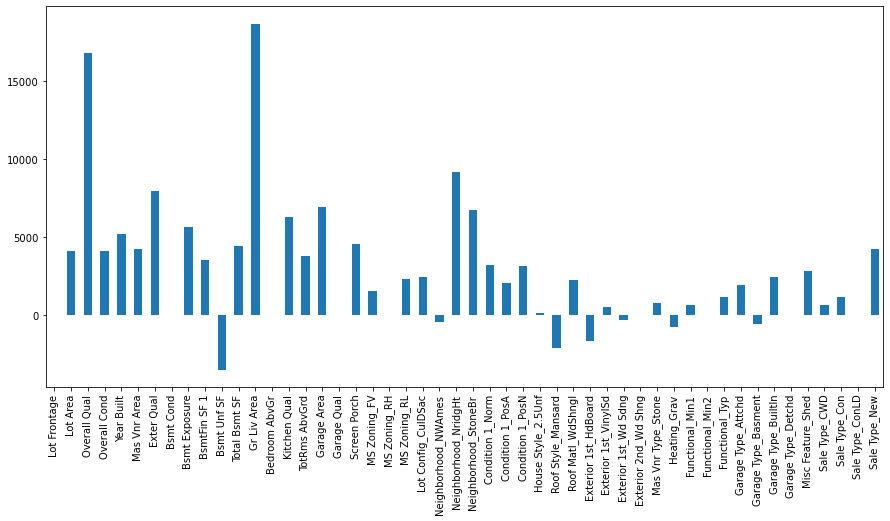

In [52]:
pd.Series(lasso.coef_, index=X.columns).plot.bar(figsize=(15, 7));

From the above coefficient bar chart the following features are scaled to zero through the lasso regression, Exter Qual, MS_Zoning_RH, Exterior 2nd_Wd Shng, Functional_Min2, Garage Type_Detchd and Sale Type_ConLD.

## Model Fitting and Evaluation (Other Models)

### Elastic Net

In [53]:
en.fit(X_train, y_train.ravel())

ElasticNetCV()

In [54]:
en.score(X_train, y_train)

0.15222468571525039

In [55]:
en.score(X_test, y_test)

0.15038085404924983

In [56]:
y_pred = en.predict(X_test) # making predictions on testing set
r2_score(y_test, y_pred)

0.15038085404924983

### Linear Regression

In [57]:
lr.fit(X_train, y_train.ravel())

LinearRegression()

In [58]:
lr.score(X_train, y_train)

0.8577585944937125

In [59]:
lr.score(X_test, y_test)

0.8757947877038209

In [60]:
y_pred = lr.predict(X_test) # making predictions on testing set

r2_score(y_test, y_pred) 

0.8757947877038209

### Ridge

In [61]:
ridge.fit(X_train, y_train.ravel())

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [62]:
ridge.score(X_train, y_train)

0.8577051193320002

In [64]:
ridge.score(X_test, y_test)

0.876145294412716

In [65]:
y_pred = ridge.predict(X_test) # making predictions on testing set

r2_score(y_test, y_pred) 

0.876145294412716

# Highest and lowest coefficients in the regression model

In [ ]:
X_train =pd.DataFrame(X_train,columns=X.columns)

In [67]:
coef_table = pd.DataFrame({"feature": X.columns}).copy()
coef_table.insert(len(coef_table.columns), "Coefs", lasso.coef_.transpose())
coef_table.sort_values(by="Coefs", ascending=False).iloc[np.r_[0:5, -5:0]]

,feature,Coefs
12,Gr Liv Area,18721.043137
2,Overall Qual,16825.469906
24,Neighborhood_NridgHt,9183.481895
6,Exter Qual,7933.002031
16,Garage Area,6895.388795
42,Garage Type_Basment,-617.980144
37,Heating_Grav,-773.822250
32,Exterior 1st_HdBoard,-1699.229688
30,Roof Style_Mansard,-2150.120172
10,Bsmt Unf SF,-3528.928854


The top 5 highest coeficients to the features are Gr Liv Area, Overall Qual, Neighborhood_NdridgHt, Exter Qual and Garage Area in decreasing order respectively.
The bottom 5 lowest coefficents to the features are Garage Type_Basement, Heating_Grav, Exterior 1st_HdBoard, Roof Dtyle_Mansard and Bsmt Unf SF respectively.

## Evaluation of the root mean square error (lasso)

In [68]:
# fit to the lasso model
lasso.fit(X_train, y_train.ravel())

LassoCV(n_alphas=200)

In [69]:
predictions = lasso.predict(X_train)
y_train[:5], predictions[:5]

(array([[275000],
        [183500],
        [111250],
        [225000],
        [317000]], dtype=int64),
 array([258869.44468532, 193854.43163218, 111396.56100071, 188471.57418972,
        322147.03752113]))

In [70]:
np.sqrt(metrics.mean_squared_error(y_train.ravel(), predictions))

30171.29472682955

## Evaluation of the root mean square error (Other model)

In [155]:
# elastic net (RMSE)
predictions = en.predict(X_train)
y_train[:5], predictions[:5]
np.sqrt(metrics.mean_squared_error(y_train.ravel(), predictions))

73115.28349914399

In [156]:
# linear regression (RMSE)
predictions = lr.predict(X_train)
y_train[:5], predictions[:5]
np.sqrt(metrics.mean_squared_error(y_train.ravel(), predictions))

29948.89495084354

In [157]:
# ridge (RMSE)
predictions = ridge.predict(X_train)
y_train[:5], predictions[:5]
np.sqrt(metrics.mean_squared_error(y_train.ravel(), predictions))

29954.524013286835

## Summary of the Model Outputs

The above-mentioned model Outputs are summarised in the following table.

|Model Type|Cross Validation Score|Mean Square Score|Root Mean Square Error|
|---|---|---|---|
|Linear Regression|0.819|0.876|21948| 
|Elastic Net|0.148|0.150|73115| 
|Lasso|0.819|0.876|30171| 
|Ridge|0.819|0.876|29954| 

From the above table the Elastic Net model is values as the scores and RMSE is not performing as expected as it should be similar to the Lasso and Ridge model as it is an amalgamation of both aforementioned model. A possibility of such result could be due to the hyperparameter of the model which should be explored prior to use of this model for results on the current dataset.

## Data Cleaning of the actual Test file

In [106]:
test_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    int64  
 8   Lot Shape        878 non-null    int64  
 9   Land Contour     878 non-null    int64  
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [107]:
# Data Cleaning of the actual test dataset.
# Fill in categorical columns which does not have equal weightages between options. 
test_c = []
test_c = act_test.copy()
# Removal of duplicate column
test_c = test_c.drop_duplicates()

## Use Mapping to encode the catagorical columns which has ranking within the categories into ordinals.
# Type casting the str into int (Alley)
test_c['Alley'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Qual)
test_c['Bsmt Qual'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Cond)
test_c['Bsmt Cond'].fillna('NA', inplace=True)
# Type casting the str into int (Bsmt Exposure)
test_c['Bsmt Exposure'].fillna('NA', inplace=True)
# Type casting the str into int (BsmtFin Type 1)
test_c['BsmtFin Type 1'].fillna('NA', inplace=True)
# Type casting the str into int (BsmtFin Type 2)
test_c['BsmtFin Type 2'].fillna('NA', inplace=True)
# Type casting the str into int (Fireplace Qu)
test_c['Fireplace Qu'].replace(np.nan, 'NA', inplace=True)
# Type casting the str into int (Garage Finish)
test_c['Garage Finish'].fillna('NA', inplace=True)
# Type casting the str into int (Garage Qual)
test_c['Garage Qual'].fillna('NA', inplace=True)
# Typae casting the str into int (Garage Cond)
test_c['Garage Cond'].fillna('NA', inplace=True)
# Type casting the str into int (Pool QC)
test_c['Pool QC'].fillna('NA', inplace=True)
# Type casting the str into int (Fence)
test_c['Fence'].fillna('NA', inplace=True)

print(test_c.shape)
test_c.info()

(878, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House 

In [108]:
## Use Mapping to encode the catagorical columns which has ranking within the categories (ordinals) into numerical columns.
# Type casting the str into int (Alley)
test_c['Alley'] = test_c['Alley'].map({'Grvl': 2, 'Pave':1, 'NA': 0})
# Type casting the str into int (Lot Shape)
test_c['Lot Shape'] = test_c['Lot Shape'].map({'Reg': 3, 'IR1':2 , 'IR2':1, 'IR3': 0})
# Type casting the str into int (Land Contor)
test_c['Land Contour'] = test_c['Land Contour'].map({'Lvl': 3, 'HLS':2 , 'Bnk':1, 'Low': 0})
# Type casting the str into int (Exter Qual)
test_c['Exter Qual'] = test_c['Exter Qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Exter Cond)
test_c['Exter Cond'] = test_c['Exter Cond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Bsmt Qual)
test_c['Bsmt Qual'] = test_c['Bsmt Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Bsmt Cond)
test_c['Bsmt Cond'] = test_c['Bsmt Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Bsmt Exposure)
test_c['Bsmt Exposure'] = test_c['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
# Type casting the str into int (BsmtFin Type 1)
test_c['BsmtFin Type 1'] = test_c['BsmtFin Type 1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (BsmtFin Type 2)
test_c['BsmtFin Type 2'] = test_c['BsmtFin Type 2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (Heating QC)
test_c['Heating QC'] = test_c['Heating QC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Central Air)
test_c['Central Air'] = test_c['Central Air'].map({'Y': 1, 'N': 0})
# Type casting the str into int (Electrical)
test_c['Electrical'] = test_c['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
# Type casting the str into int (Kitchen Qual)
test_c['Kitchen Qual'] = test_c['Kitchen Qual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
# Type casting the str into int (Fireplace Qu)
test_c['Fireplace Qu'] = test_c['Fireplace Qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Garage Finish)
test_c['Garage Finish'] = test_c['Garage Finish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0})
# Type casting the str into int (Garage Qual)
test_c['Garage Qual'] = test_c['Garage Qual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Typae casting the str into int (Garage Cond)
test_c['Garage Cond'] = test_c['Garage Cond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
# Type casting the str into int (Pool QC)
test_c['Pool QC'] = test_c['Pool QC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0})
# Type casting the str into int (Fence)
test_c['Fence'] = test_c['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0})


print(test_c.shape)
test_c.info()

(878, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    int64  
 8   Lot Shape        878 non-null    int64  
 9   Land Contour     878 non-null    int64  
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House 

In [109]:
### Simple imputer for actual test column
# Filter numeric column
integer_columns = test_c.select_dtypes(include=['int64', 'float64']).columns
numeric_train = imp_n.fit_transform(test_c[integer_columns]) 
# Filter categorical column
object_columns = test_c.select_dtypes(include=['object']).columns
cat_train = imp_c.fit_transform(test_c[object_columns]) 
# Convert to dataframe
X_act_test_numeric = pd.DataFrame(numeric_train, columns = integer_columns)
X_act_test_categories = pd.DataFrame(cat_train, columns = object_columns)
# Use concat to join the numeric and categorical column
X_act_test = pd.concat([X_act_test_numeric, X_act_test_categories], axis=1)

In [58]:
### Use One-hot encoding(getdummies) on X_act_test
X_act_test_df = pd.get_dummies(data = X_act_test,drop_first=True)
print(X_act_test_df.shape)
X_act_test_df.info()
X_act_test_df.head()

(878, 189)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 189 entries, Id to Sale Type_WD 
dtypes: float64(58), uint8(131)
memory usage: 510.3 KB


,Id,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Norm,Condition 2_PosA,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Paved Drive_P,Paved Drive_Y,Misc Feature_Othr,Misc Feature_Shed,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658.0,902301120.0,190.0,69.000000,9142.0,2.0,3.0,3.0,6.0,8.0,1910.0,1950.0,0.0,2.0,1.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,1020.0,1020.0,3.0,0.0,1.0,908.0,1020.0,0.0,1928.0,0.0,0.0,2.0,0.0,4.0,2.0,1.0,9.0,0.0,0.0,1910.0,1.0,1.0,440.0,1.0,1.0,0.0,60.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,2718.0,905108090.0,90.0,69.545961,9662.0,0.0,2.0,3.0,5.0,4.0,1977.0,1977.0,0.0,2.0,2.0,4.0,3.0,1.0,1.0,0.0,1.0,0.0,1967.0,1967.0,2.0,1.0,4.0,1967.0,0.0,0.0,1967.0,0.0,0.0,2.0,0.0,6.0,2.0,2.0,10.0,0.0,0.0,1977.0,3.0,2.0,580.0,3.0,3.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2006.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,

In [111]:
### Drop of columns identified in the above colummn after encoding.
drp_clm = ['Id', 'PID', 'Bsmt Half Bath', 'Full Bath', '3Ssn Porch', 'Mo Sold', 'Yr Sold', 'Enclosed Porch', 'BsmtFin SF 2',
           'Low Qual Fin SF', 'Central Air', 'Garage Cond', 'Electrical', 'Exter Cond', 'Pool QC', 'BsmtFin Type 2', 
           'Fence', 'MS SubClass', 'Alley', 'Lot Shape', 'Land Contour', 'Year Remod/Add', 'Bsmt Qual', 'BsmtFin Type 1', 'Heating QC',
           '1st Flr SF', '2nd Flr SF', 'Bsmt Full Bath', 'Half Bath', 'Kitchen AbvGr', 'Fireplaces', 'Fireplace Qu', 'Garage Yr Blt',
           'Garage Finish', 'Garage Cars', 'Wood Deck SF', 'Open Porch SF', 'Pool Area', 'Misc Val', 'MS Zoning_I (all)',
           'MS Zoning_RM', 'Street_Pave', 'Utilities_NoSewr', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Land Slope_Mod', 'Land Slope_Sev',
           'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 
           'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
           'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
           'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition 1_Feedr', 
           'Condition 1_RRAe', 'Condition 1_RRAn', 'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Norm', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs', 
           'Bldg Type_TwnhsE', 'House Style_1.5Unf', 'House Style_1Story', 'House Style_2.5Fin',
           'House Style_1.5Unf', 'House Style_2Story', 'House Style_SFoyer', 'House Style_SLvl', 'Roof Style_Gable', 'Roof Style_Gambrel', 'Roof Style_Hip',
           'Roof Style_Shed', 'Exterior 1st_AsphShn', 'Exterior 1st_BrkComm', 'Exterior 1st_BrkFace', 'Exterior 1st_CemntBd', 'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 
           'Exterior 1st_MetalSd', 'Exterior 1st_Plywood', 'Exterior 1st_Stucco',
           'Exterior 1st_WdShing', 'Exterior 2nd_AsphShn', 'Exterior 2nd_Brk Cmn', 'Exterior 2nd_BrkFace', 'Exterior 2nd_CBlock', 'Exterior 2nd_CmentBd',
           'Exterior 2nd_HdBoard', 'Exterior 2nd_ImStucc', 'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood', 'Exterior 2nd_Stucco',
           'Exterior 2nd_VinylSd', 'Exterior 2nd_Wd Sdng', 'Mas Vnr Type_BrkFace', 'Mas Vnr Type_None', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
           'Foundation_Stone', 'Foundation_Wood', 'Heating_GasW', 'Functional_Maj2', 'Functional_Mod', 'Garage Type_CarPort', 
           'Garage Type_CarPort', 'Paved Drive_P', 'Paved Drive_Y', 'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_WD ']
X_act_test_df.drop(drp_clm, axis = 1, inplace=True)
X_act_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lot Frontage          878 non-null    float64
 1   Lot Area              878 non-null    float64
 2   Overall Qual          878 non-null    float64
 3   Overall Cond          878 non-null    float64
 4   Year Built            878 non-null    float64
 5   Mas Vnr Area          878 non-null    float64
 6   Exter Qual            878 non-null    float64
 7   Bsmt Cond             878 non-null    float64
 8   Bsmt Exposure         878 non-null    float64
 9   BsmtFin SF 1          878 non-null    float64
 10  Bsmt Unf SF           878 non-null    float64
 11  Total Bsmt SF         878 non-null    float64
 12  Gr Liv Area           878 non-null    float64
 13  Bedroom AbvGr         878 non-null    float64
 14  Kitchen Qual          878 non-null    float64
 15  TotRms AbvGrd         8

In [112]:
### For the training columns ###
dif_1 = [x for x in X.columns if x not in X_act_test_df.columns]
print(f"Features present in train_category and absent in test_category: {dif_1}")

dif_2 = [x for x in X_act_test_df.columns if x not in X.columns]
print(f"Features present in test_category set and absent in train_category: {dif_2}")

X.drop(dif_1, axis=1, inplace=True)
X_act_test_df.drop(dif_2, axis=1, inplace=True)

Features present in train_category and absent in test_category: []
Features present in test_category set and absent in train_category: ['Condition 2_PosA', 'Roof Matl_Metal', 'Roof Matl_Roll', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShake', 'Exterior 1st_PreCast', 'Exterior 2nd_Other', 'Exterior 2nd_PreCast', 'Mas Vnr Type_CBlock', 'Heating_GasA', 'Misc Feature_Othr', 'Sale Type_Oth', 'Sale Type_VWD']


In [113]:
y_pred = lasso.predict(X_act_test_df)

In [125]:
y_act_result = act_test[['Id']]
y_act_result['SalePrice'] = y_pred

C:\Users\Farah Liyana\AppData\Local\Temp\ipykernel_9684\2002943890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_act_result['SalePrice'] = y_pred


## Output the Sale Price to csv

In [128]:
y_act_result.to_csv('output/y_act_result.csv')

## Limitations to the model

The following are the limitations of the model:
1. Limited to features and scaling used in model such as neighbourhood, type of housing
2. Model is feasible on assumptions that future environment remain constant/same, i.e. national real estate regulations, economic status at time of sales. 
3. Sales price can change drastically should there be changes in macroeconomy (i.e no occurances such as pandemic)
4. Accuracy is limited to type of modelling and parameters used. 
5. There may be better machine learning models or hypertuning methods available currently and in future that can provide better prediction

The regression model used also has the following assumptions:
1. An assumption of linearity between dependent and independent variables.
2. An assumption that the linear regression is sensitive to outliers.

## Conclusions and Recommendations

In conclusion a regression model is used on the dataset provided. A lasso regression model is used and with a cross validation mean score of 0.819, a mean square validation score of 0.876 and a mean cross validation of 30171 respectively. The model was shortlised based on above criteria ensures chosen model provide best predict property value, allowing bank give a safe valuation for closest mortgage loan or real estate acquisition consideration.   

The following recommendations for the futher analysis to strengthen the model are to further explore the following features in more in-depth. The features are Gnr Liv Area (Above grade (ground) living area square feet), Overall Quality and the Neighbourhood of the housing.